In [2]:
import numpy as np
import helper_functions as functions
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from collections import Counter

In [62]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [63]:
len(data_json_list)

17335

In [4]:
data_json_list[10]

{'subjectIndex': 63,
 'sessionIndex': 1,
 'listIndex': 10,
 'listLength_studyPhase': 16,
 'listLength_recallPhase': 14,
 'wordIndices_studyPhase': [1601,
  117,
  477,
  239,
  1100,
  457,
  276,
  715,
  972,
  43,
  948,
  1323,
  1570,
  189,
  588,
  1582],
 'serialPositions_studyPhase': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15],
 'actualWords_studyPhase': ['WHALE',
  'BEGGAR',
  'DOCK',
  'CAPTAIN',
  'POLYESTER',
  'DIAL',
  'CHALK',
  'HOOK',
  'OFFICE',
  'ARTIST',
  'NEWSPAPER',
  'SLACKS',
  'VIOLA',
  'BUGLE',
  'FOLDER',
  'WALL'],
 'wordIndices_recallPhase': [239,
  715,
  117,
  1601,
  477,
  972,
  43,
  1582,
  155,
  948,
  1323,
  1100,
  457,
  -1],
 'serialPositions_recallPhase': [3,
  7,
  1,
  16,
  2,
  8,
  9,
  15,
  -1,
  10,
  11,
  4,
  5,
  -1],
 'actualWords_recallPhase': ['CAPTAIN',
  'HOOK',
  'BEGGAR',
  'WHALE',
  'DOCK',
  'OFFICE',
  'ARTIST',
  'WALL',
  'BOULDER',
  'NEWSPAPER',
  'SLACKS',
  'POLYESTER'

### task = average words recalled from study phase


In [64]:
recall_power = []

for r in data_json_list:
    recall_indices = list(set(r["serialPositions_recallPhase"]))
    l = len(recall_indices)
    if -1 in recall_indices:
        l = l-1
    if 0 in recall_indices and 16 in recall_indices:
        l = l-1
    recall_power.append([r["subjectIndex"],r["sessionIndex"],r["listIndex"],l])    
    
cols = ['subjectIndex',
        'sessionIndex',
        'listIndex',
        'wordsRecalled']

df_recall_power = pd.DataFrame(recall_power, columns = cols)

In [65]:
df_recall_power.shape

(17335, 4)

In [66]:
df_recall_power.head(15)

,subjectIndex,sessionIndex,listIndex,wordsRecalled
0,63,1,0,7
1,63,1,1,4
2,63,1,2,8
3,63,1,3,6
4,63,1,4,10
5,63,1,5,5
6,63,1,6,8
7,63,1,7,11
8,63,1,8,3
9,63,1,9,11


In [67]:
df_recall_power.wordsRecalled.mean()

9.885030285549467

In [10]:
### same user recalled 12 out of 16 in 11th list but 3 out of 16 in 8th list 
### is there a concept of fatigue ?? lag ?? refreshment ?? reinforcing the memory muscles over time.

data_json_list[8] , data_json_list[11]

({'subjectIndex': 63,
  'sessionIndex': 1,
  'listIndex': 8,
  'listLength_studyPhase': 16,
  'listLength_recallPhase': 3,
  'wordIndices_studyPhase': [21,
   1099,
   691,
   179,
   1226,
   1362,
   20,
   751,
   243,
   253,
   463,
   17,
   884,
   201,
   1010,
   844],
  'serialPositions_studyPhase': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15],
  'actualWords_studyPhase': ['ANCHOR',
   'POLITICIAN',
   'HATCHET',
   'BROTHER',
   'SALIVA',
   'SQUIRREL',
   'ANCESTOR',
   'JAW',
   'CARD',
   'CASHEW',
   'DICTIONARY',
   'ALMANAC',
   'MECHANIC',
   'BUS',
   'PANTS',
   'LOOP'],
  'wordIndices_recallPhase': [844, 884, 201],
  'serialPositions_recallPhase': [15, 12, 13],
  'actualWords_recallPhase': ['LOOP', 'MECHANIC', 'BUS']},
 {'subjectIndex': 63,
  'sessionIndex': 1,
  'listIndex': 11,
  'listLength_studyPhase': 16,
  'listLength_recallPhase': 12,
  'wordIndices_studyPhase': [1298,
   145,
   1061,
   53,
   1076,
  

In [13]:
df_recall_power.wordsRecalled.value_counts()

9     1993
10    1972
11    1829
8     1787
12    1659
7     1498
13    1355
6     1172
14    1100
15     876
5      725
16     592
4      425
3      229
2       97
1       26
Name: wordsRecalled, dtype: int64

In [14]:
df_y_n = df_recall_power.wordsRecalled.value_counts(normalize=True).rename_axis('words_recalled').reset_index(name='percentage_of_total')
df_y_n

,words_recalled,percentage_of_total
0,9,0.114970
1,10,0.113758
2,11,0.105509
3,8,0.103086
4,12,0.095702
5,7,0.086415
6,13,0.078166
7,6,0.067609
8,14,0.063455
9,15,0.050534


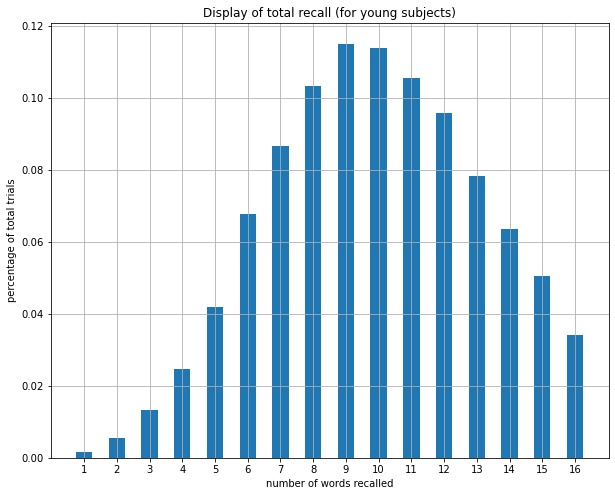

In [29]:
plt.figure(figsize = (10, 8))

plt.bar(df_y_n["words_recalled"], 
        df_y_n["percentage_of_total"],
        width = 0.5)
 
plt.xticks([i for i in range(1,17)])
plt.title("Display of total recall (for young subjects)")
plt.xlabel("number of words recalled")
plt.ylabel("percentage of total trials")
plt.grid()
plt.show()

In [56]:
with open('old_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [57]:
len(data_json_list)

3644

In [58]:
recall_power = []

for r in data_json_list:
    recall_indices = list(set(r["serialPositions_recallPhase"]))
    l = len(recall_indices)
    if -1 in recall_indices:
        l = l-1
    if 0 in recall_indices and 16 in recall_indices:
        l = l-1
    recall_power.append([r["subjectIndex"],r["sessionIndex"],r["listIndex"],l])    
    
cols = ['subjectIndex',
        'sessionIndex',
        'listIndex',
        'wordsRecalled']

df_recall_power = pd.DataFrame(recall_power, columns = cols)

In [59]:
df_recall_power.shape

(3644, 4)

In [60]:
df_recall_power.head(5)

,subjectIndex,sessionIndex,listIndex,wordsRecalled
0,154,1,0,7
1,154,1,1,6
2,154,1,2,8
3,154,1,3,7
4,154,1,4,8


In [61]:
df_recall_power.wordsRecalled.mean()

6.97530186608123

In [36]:
df_o_n = df_recall_power.wordsRecalled.value_counts(normalize=True).rename_axis('words_recalled').reset_index(name='percentage_of_total')
df_o_n

,words_recalled,percentage_of_total
0,6,0.166575
1,7,0.163008
2,5,0.142151
3,8,0.141603
4,9,0.100165
5,4,0.092481
6,10,0.074094
7,11,0.039517
8,3,0.037596
9,12,0.019210


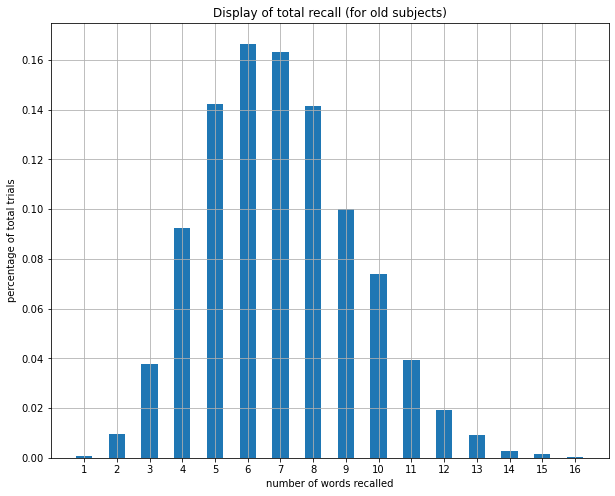

In [38]:
plt.figure(figsize = (10, 8))

plt.bar(df_o_n["words_recalled"], 
        df_o_n["percentage_of_total"],
        width = 0.5)
 
plt.xticks([i for i in range(1,17)])
plt.title("Display of total recall (for old subjects)")
plt.xlabel("number of words recalled")
plt.ylabel("percentage of total trials")
plt.grid()
plt.show()

### task = age hypothesis on recall

### 9.88 and 6.97 words recalled on average

In [43]:
df_total_n = pd.merge(df_y_n, df_o_n, on="words_recalled",suffixes=('_young', '_old'))
df_total_n = df_total_n.sort_values(by="words_recalled")

In [44]:
df_total_n

,words_recalled,percentage_of_total_young,percentage_of_total_old
15,1,0.001500,0.000549
14,2,0.005596,0.009605
13,3,0.013210,0.037596
12,4,0.024517,0.092481
10,5,0.041823,0.142151
7,6,0.067609,0.166575
5,7,0.086415,0.163008
3,8,0.103086,0.141603
0,9,0.114970,0.100165
1,10,0.113758,0.074094


<Figure size 720x576 with 0 Axes>

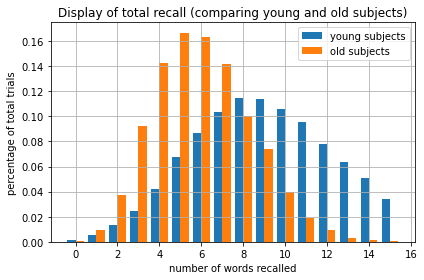

In [54]:
plt.figure(figsize = (10, 8))

labels = df_total_n["words_recalled"]
young_s = df_total_n["percentage_of_total_young"]
old_s = df_total_n["percentage_of_total_old"]

# x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, young_s, width, label='young subjects')
rects2 = ax.bar(x + width/2, old_s, width, label='old subjects')


ax.set_ylabel("percentage of total trials")
ax.set_xlabel("number of words recalled")
ax.set_title("Display of total recall (comparing young and old subjects)")
# ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.grid()
plt.show()



In [100]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)
    
len(data_json_list)

17335

17335

### task = creating recall index counters
### 16 and 0 in recall are both 0

In [95]:
recall_counter = [0]*16

for r in data_json_list:
    ### ignoring external words and duplicates
    recall_indices = list(set(r["serialPositions_recallPhase"]))
    for i in recall_indices:
        if i>=0:
            if i==0 or i==16:
                recall_counter[0]+=1
            else:
                recall_counter[i]+=1

In [96]:
recall_counter

[12159,
 11241,
 10535,
 10147,
 9813,
 9447,
 9224,
 9081,
 8936,
 9130,
 9376,
 9528,
 10506,
 11669,
 14193,
 16382]

In [97]:
total_trials = len(data_json_list)

recall_counter = [i/total_trials for i in recall_counter]

In [98]:
print(recall_counter)

[0.7014133256417652, 0.648456879146236, 0.6077300259590424, 0.5853475627343525, 0.5660801845976349, 0.5449668301124891, 0.5321026824343813, 0.5238534756273435, 0.515488895298529, 0.526680126910874, 0.5408710700894145, 0.5496394577444477, 0.6060571098932795, 0.6731468128064609, 0.8187481972887223, 0.9450245168733775]


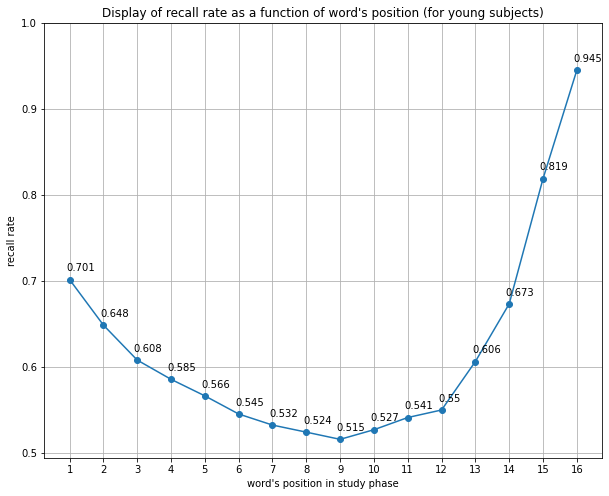

In [99]:
word_index = [i for i in range(1,17)]
recall_rate = recall_counter

  
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(word_index, recall_rate, marker = 'o')
plt.xticks([i for i in range(1,17)])
plt.yticks([i/10 for i in range(5,11)])
plt.title("Display of recall rate as a function of word's position (for young subjects)")
plt.xlabel("word's position in study phase")
plt.ylabel("recall rate")

for index in range(len(word_index)):
    ax.text(word_index[index]-0.1, recall_rate[index]+0.01, round(recall_rate[index],3), size=10)
plt.grid()
plt.show() 

### task = creating recall index counters - for probability of first recall


In [81]:
first_recall_counter = [0]*16

for r in data_json_list:
    ### consider the list as it is - without conditioning
    recall_indices = r["serialPositions_recallPhase"]
#     print(recall_indices)
    for i in recall_indices:
        ### ignoring external words
        if i>=0:
            if i==0 or i==16:
                first_recall_counter[0]+=1
            else:
                first_recall_counter[i]+=1
            break

In [82]:
first_recall_counter

[987,
 170,
 105,
 101,
 91,
 90,
 92,
 106,
 144,
 215,
 373,
 541,
 1039,
 1395,
 3203,
 8683]

In [83]:
total_trials = len(data_json_list)

first_recall_counter = [i/total_trials for i in first_recall_counter]

In [84]:
print(first_recall_counter)

[0.05693683299682723, 0.00980674935102394, 0.006057109893279493, 0.005826362849725988, 0.005249495240842227, 0.005191808479953851, 0.005307182001730603, 0.006114796654167869, 0.00830689356792616, 0.012402653591000866, 0.02151716181136429, 0.03120853764061148, 0.05993654456302279, 0.08047303143928468, 0.1847706951254687, 0.5008941447937698]


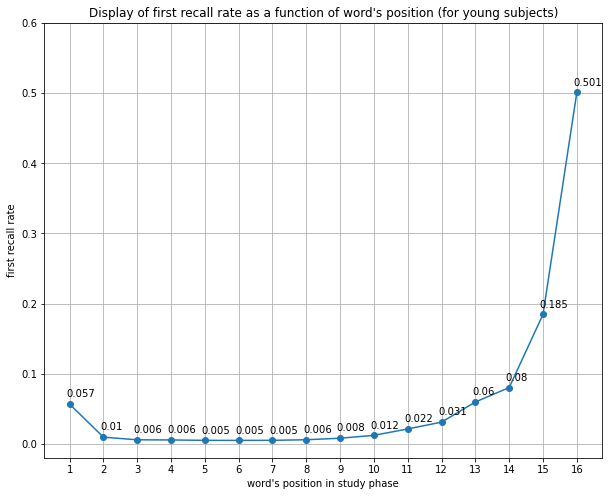

In [92]:
word_index = [i for i in range(1,17)]
recall_rate = first_recall_counter
  
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(word_index, recall_rate, marker = 'o')
plt.xticks([i for i in range(1,17)])
plt.yticks([i/10 for i in range(0,7)])
plt.title("Display of first recall rate as a function of word's position (for young subjects)")
plt.xlabel("word's position in study phase")
plt.ylabel("first recall rate")

for index in range(len(word_index)):
    ax.text(word_index[index]-0.1, recall_rate[index]+0.01, round(recall_rate[index],3), size=10)
plt.grid()
plt.show()    
    


In [3]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)
    
len(data_json_list)

17335

In [5]:
all_recalls_subj_id = []


for i in data_json_list:
    if len(i)>0:
        ### fixing 16,0 problem
        current_recall = i["serialPositions_recallPhase"]
        if -1 in current_recall:
            all_recalls_subj_id.append(i["subjectIndex"])
        

In [6]:
len(all_recalls_subj_id)

5074

In [8]:
5074/17335

0.29270262474762043

In [7]:
len(set(all_recalls_subj_id))

186

### task = looking at CRP and lag


In [101]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)
    
len(data_json_list)

17335

In [120]:
all_recalls = []


for i in data_json_list:
    if len(i)>0:
        ### fixing 16,0 problem
        current_recall = i["serialPositions_recallPhase"]
        current_recall = [x if x!=16 else 0 for x in current_recall]
        all_recalls.append(current_recall)

In [121]:
len(all_recalls)

17335

In [122]:
all_recalls[:5]

[[15, 13, 6, 1, 2, 0, 9],
 [15, 13, 12, 1],
 [14, 15, 2, 5, 6, 1, 9, 4],
 [10, 13, 12, 15, 1, 0],
 [3, 11, 15, 14, 7, 6, 5, 12, 9, 13]]

In [124]:
### https://memory.psych.upenn.edu/CRP_Tutorial


recalls_sp = all_recalls
lag_examine = 15
list_length = 16
possible_counts = np.zeros(2*lag_examine+1)
actual_counts = np.zeros(2*lag_examine+1)


for i in range(len(recalls_sp)):
    recallornot = np.zeros(list_length)
    for j in range(len(recalls_sp[i]))[:-1]:
        ### for [15, 13, 6, 1, 2, 0] , sp1=15 and sp2=13
        sp1 = recalls_sp[i][j]
        sp2 = recalls_sp[i][j+1]
        if 0 <= sp1 <100:
            recallornot[sp1] = 1
            if 0 <= sp2 <100:
                lag = sp2 - sp1
                if np.abs(lag) <= lag_examine:
                    actual_counts[lag+lag_examine] += 1
                for k,item in enumerate(recallornot):    
                    if item==0:
                        lag = k - sp1
                        if np.abs(lag) <= lag_examine:
                            possible_counts[lag+lag_examine] += 1                   
crp = [(actual_counts[i]+1)/(possible_counts[i]+1) for i in range(len(actual_counts))]
crp[lag_examine] = 0


In [125]:
crp

[0.08095645873130887,
 0.04732599150651407,
 0.043987555796023266,
 0.042468272119826,
 0.04220129487934079,
 0.04376944576280124,
 0.04456650546071806,
 0.04765836970626401,
 0.05059695347879786,
 0.053991451460162265,
 0.056882520525550255,
 0.06362419760927257,
 0.07949139441970847,
 0.10388274348015145,
 0.24522218639865698,
 0,
 0.40783635961260817,
 0.12110331908352946,
 0.0928075489906978,
 0.07549399428597071,
 0.0679794264027831,
 0.06593610698365528,
 0.06073647967752771,
 0.05586836229492282,
 0.05452674897119342,
 0.053879686137750654,
 0.051816503849097376,
 0.05554146588891707,
 0.06073558648111332,
 0.08054929288788686,
 0.11722488038277512]

In [126]:
len(crp)

31

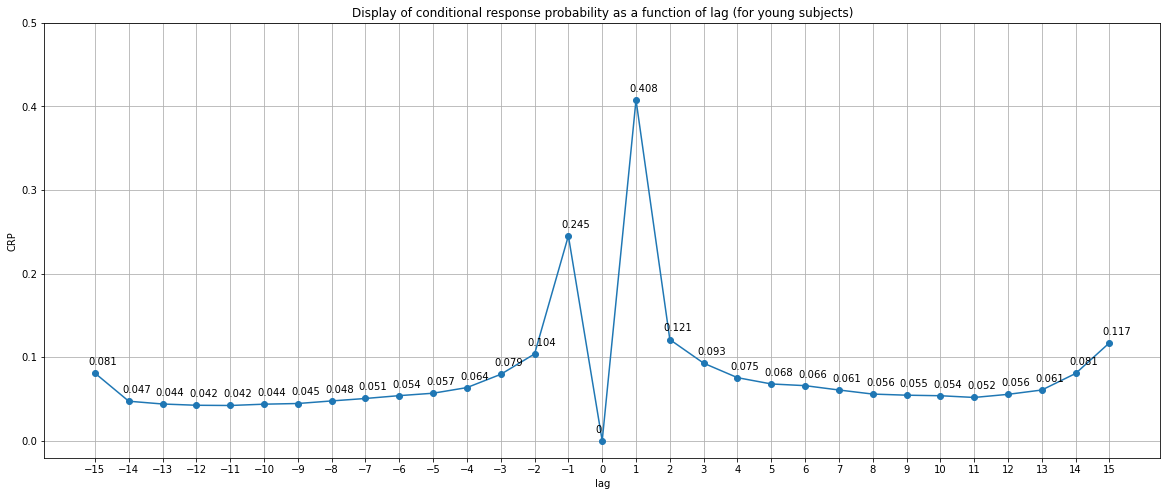

In [137]:
word_index = [i for i in range(-15,16)]
recall_rate = crp

  
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(word_index, recall_rate, marker = 'o')
plt.xticks(word_index)
plt.yticks([i/10 for i in range(0,6)])
plt.title("Display of conditional response probability as a function of lag (for young subjects)")
plt.xlabel("lag")
plt.ylabel("CRP")

for index in range(len(word_index)):
    ax.text(word_index[index]-0.2, recall_rate[index]+0.01, round(recall_rate[index],3), size=10)
plt.grid()
plt.show() 